# AUTOMATING A SYSTEM TO PREDICT WHETHER A CUSTOMER IS ELIGIBLE FOR A LOAN OR NOT

In [1]:
pwd

'D:\\ML files\\github\\data science\\classification'

IMPORT ALL RELEVANT LIBRARIES FOR THE PREPROCESSING STAGES

In [2]:
import os
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT BOTH THE TRAINING AND TESTING DATASET

In [3]:
train_data=pd.read_csv(r'D:\ML DATA\MAchine learning data\Loan prediction\train_ctrUa4K.csv')
test_data=pd.read_csv(r'D:\ML DATA\MAchine learning data\Loan prediction\test_lAUu6dG.csv')
train_data.head() #to check the first five rows of the train dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#the train data has one more column than the test data because the test data doesnt have the value to be predicted which is the loan status
print(train_data.shape) 
print(test_data.shape)

(614, 13)
(367, 12)


It is observed that the data has 13 features, 12 independent and 1 dependent which is the Loan status

--------------------------

This feature isnt neccesary to tell if a customer should recevice a loan, its a unique ID of each customer that is why its dropped

In [5]:
train_data=train_data.drop(columns='Loan_ID') 

In [6]:
#displays all the statistical information about the numerical features
train_data.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here we see that the ApplicantIncome,CoapplicantIncome,LoanAmount and Loan_Amount_Term columns all have their data dispersed and something needs to be done about this

In [7]:
#to check for null values
train_data.isnull().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is observed that 7 features have null values and this needs to be taken care of

# FEATURE ENGINEERING I

ANALYZING THE CATEGORICAL FEATURES

In [8]:
#many more customers met their credit guidelines which shows good practice by them
train_data['Credit_History'].value_counts() 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

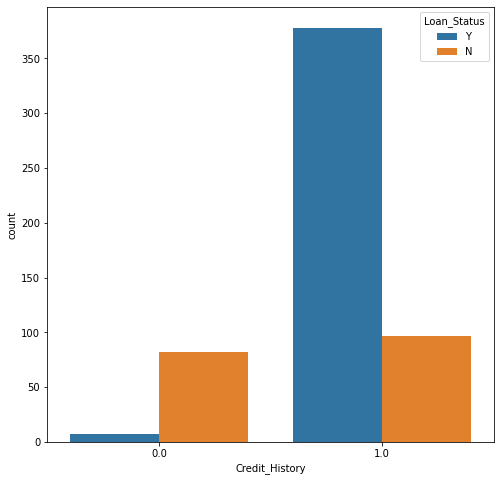

In [9]:
#Analyzing the credit history with the Loan status
plt.figure(figsize=(8,8)) 
sns.countplot(x=train_data['Credit_History'], hue=train_data['Loan_Status']); 

It is observed that the individuals who met their credit guidelines had their loan approved way many more times than individuals who did not

In [10]:
#Many more Males applied for Loan
train_data['Gender'].value_counts() 

Male      489
Female    112
Name: Gender, dtype: int64

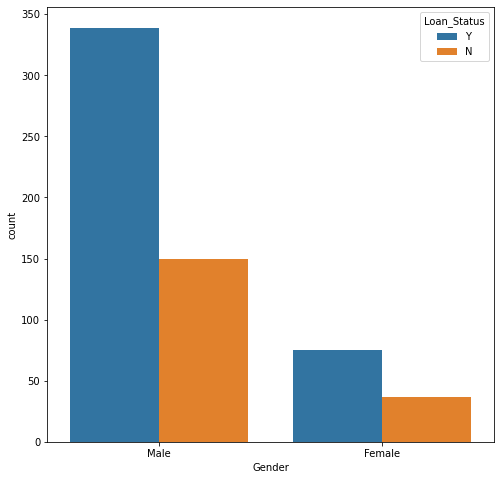

In [11]:
#Analyzing the Gender feature with the Loan status
plt.figure(figsize=(8,8)) 
sns.countplot(x=train_data['Gender'], hue=train_data['Loan_Status']); 

Due to the high number of males that applied for the loan, it is no suprise that the graph follows suit in they having high values of  getting/not getting their loan approved

In [12]:
#Married individuals applied for the loan more than the single counterparts
train_data['Married'].value_counts() 

Yes    398
No     213
Name: Married, dtype: int64

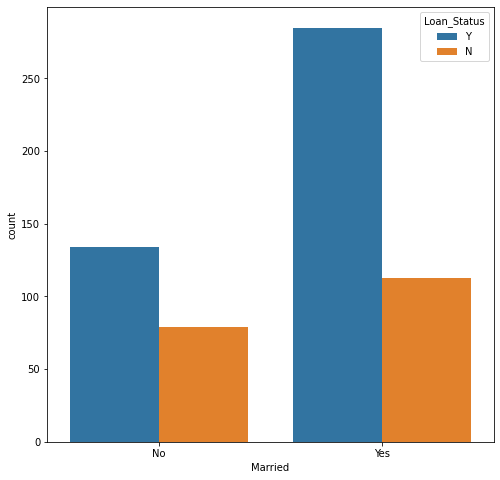

In [13]:
#Analyzing the Married/Single indivdiuals  with the Loan status
plt.figure(figsize=(8,8)) 
sns.countplot(x=train_data['Married'], hue=train_data['Loan_Status']); 

This married feature follows the same pattern as the Gender as expected, no suprises here either

In [14]:
#This indicates that individuals who arent self employed(without a job, working with a company) need Loans
train_data['Self_Employed'].value_counts()  

No     500
Yes     82
Name: Self_Employed, dtype: int64

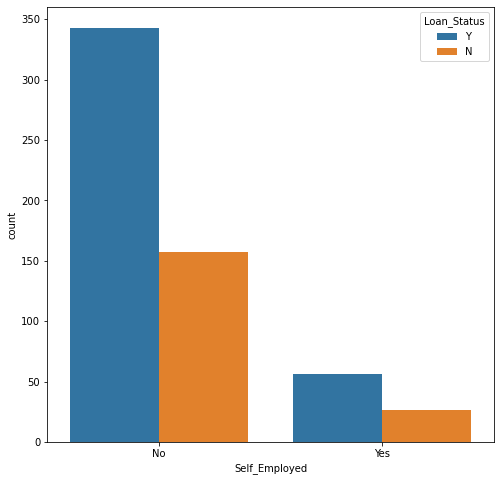

In [15]:
#Analyzing the Married/Single indivdiuals  with the Loan status
plt.figure(figsize=(8,8)) 
sns.countplot(x=train_data['Self_Employed'], hue=train_data['Loan_Status']); 

The data seems to be following the same pattern here too, the more the number, the greater of chances of getting loan approved

In [16]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
#fill
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])

In [18]:
 #This shows more individuals that depend on themselves applied for the loan which could indictate more young people applied for the loan
train_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

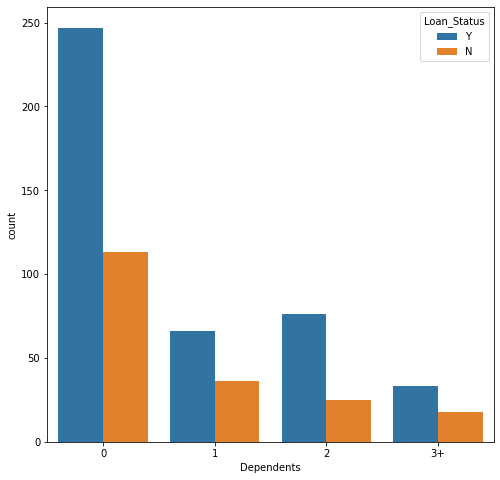

In [19]:
#Analyzing the Married/Single indivdiuals  with the Loan status
plt.figure(figsize=(8,8)) 
sns.countplot(x=train_data['Dependents'], hue=train_data['Loan_Status']); 

Well it can also be seen here that, the greater the number of people in a category applying for a loan, the higher the chances of approval

IT CAN BE OBSERVED THAT THE COMPANY DOESNT DICRIMINATE INDIVIDUALS. PRIORITY ISNT GIVEN TO A PARTCULAR GROUP OF PEOPLE OVER OTHERS, WHICH IS ALWAYS VERY GOOD TO SEE

# FEATURE ENGINEERING II

ANALYZING THE NUMERICAL FEATURES

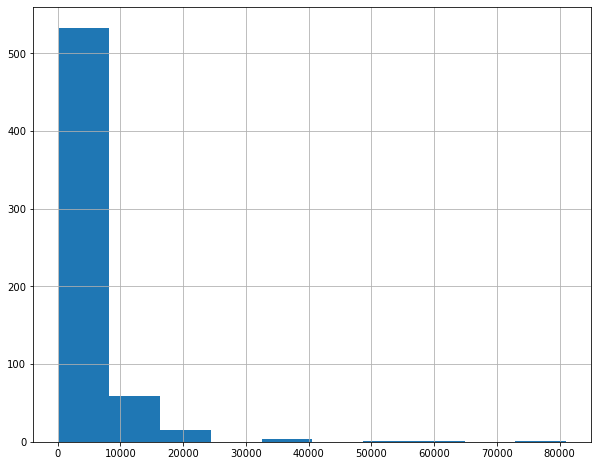

In [20]:
#plotting the histogram of the ApplicantIncome featureset
plt.figure(figsize=(10,8))
train_data['ApplicantIncome'].hist(); 

It can be observed that the feature is a bit right skewed and contains outliers and that needs to be corrected
Also it is clear that the majority of individuals make around 5000 dollars

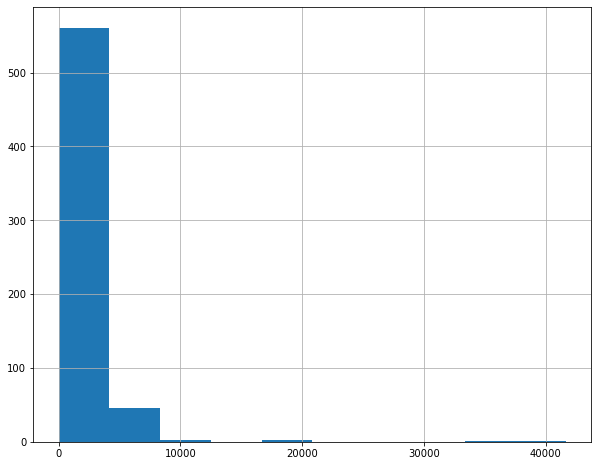

In [21]:
#plotting the histogram of the CoApplicantIncome featureset
plt.figure(figsize=(10,8))
train_data['CoapplicantIncome'].hist() 

It can be observed that this feature is also right skewed and needs also to be analyzed further and the money patterns 
follow the same structure as the Applicant income

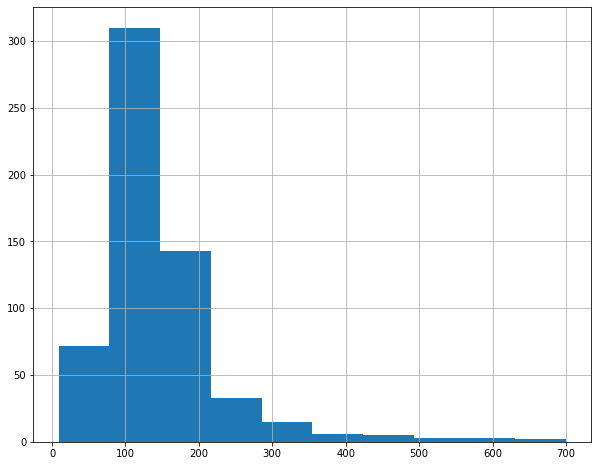

In [22]:
#plotting the histogram of the LoanAmount featureset
plt.figure(figsize=(10,8))
train_data['LoanAmount'].hist() 

It can be seen that this data seems to follow a bit of a normal distribution except very small datapoints have some right skewness
Also, it can be seen that most individuals requested for Loan Amounting around the 146,000 dollar mark. 

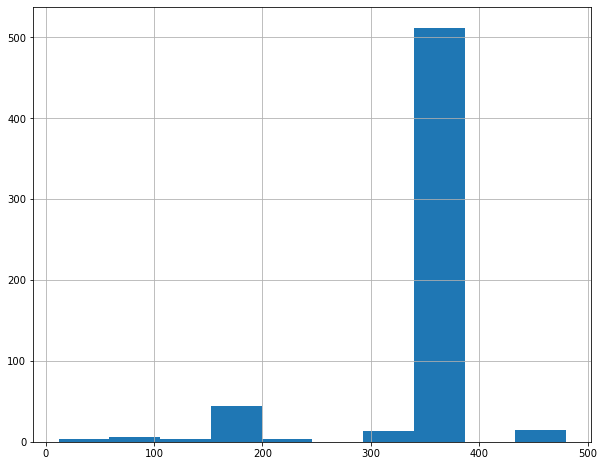

In [23]:
#plotting the histogram of the LoanAmountTerm featureset
plt.figure(figsize=(10,8))
train_data['Loan_Amount_Term'].hist() 

In [24]:
UL=np.percentile(train_data['Loan_Amount_Term'], [5])[0]
UL

nan

In [25]:
train_data['Loan_Amount_Term'][train_data['Loan_Amount_Term']<3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The loan amount term takes a funny looking shape in that most of the data is around the 380 mark which means individuals were given 380 months to payback their loans. Some discrete data can be found to the right and some also to the left.
This wont be taken care of

**********************************************

TAKING CARE OF THE SKEWNESS

*************************************

Here, we use the numpy function to determing certain percentile and scale the outliers to that percentile to try to achieve a normal distribution shape

In [26]:
#we scale all the outliers to the right to the 90th percentile
UL=np.percentile(train_data['ApplicantIncome'],[90]) [0]  
UL

9459.900000000007

In [27]:
 #the ApplicantIncome column shows all dataset above the 90th percentile of the dataset
train_data[train_data['ApplicantIncome']>UL]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
25,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
572,Male,Yes,2,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban,Y
594,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y


In [28]:
#we scale all the outliers to 3*90th percentile
train_data['ApplicantIncome'][train_data['ApplicantIncome']>3*UL]=3*UL 

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


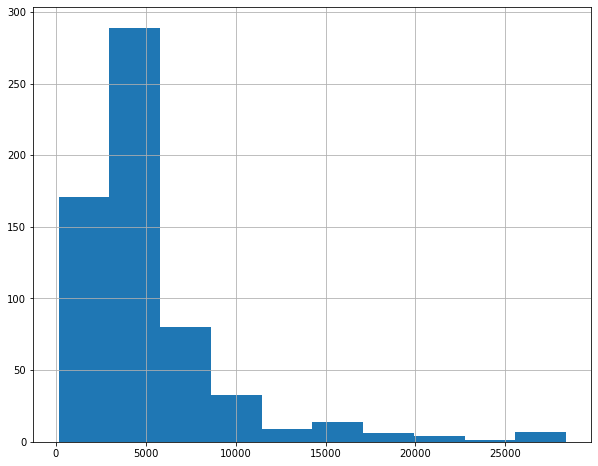

In [29]:
plt.figure(figsize=(10,8))
train_data['ApplicantIncome'].hist()

Even though there is some skewness, it does look a lot better than the original data, so we would stick to this graph

In [30]:
train_data.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,Female,Yes,1,Graduate,No,12000.0,0.0,496.0,360.0,1.0,Semiurban,Y
605,Male,Yes,0,Not Graduate,No,2400.0,3800.0,NaN,180.0,1.0,Urban,N
606,Male,Yes,1,Graduate,No,3400.0,2500.0,173.0,360.0,1.0,Semiurban,Y
607,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [31]:
#we scale all the outliers to the right to the 85th percentile
UL=np.percentile(train_data['CoapplicantIncome'], [85])[0] 


In [32]:
#the CoApplicantIncome column shows all dataset above the 85th percentile of the datas
train_data[train_data['CoapplicantIncome']>UL] 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360.0,1.0,Semiurban,N
12,Male,Yes,2,Graduate,No,3073.0,8106.0,200.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600.0,3500.0,115.0,NaN,1.0,Urban,Y
21,Male,Yes,1,Graduate,No,5955.0,5625.0,315.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
590,Male,Yes,0,Graduate,No,3000.0,3416.0,56.0,180.0,1.0,Semiurban,Y
593,Male,Yes,0,Graduate,No,3859.0,3300.0,142.0,180.0,1.0,Rural,Y
600,Female,No,3+,Graduate,NaN,416.0,41667.0,350.0,180.0,NaN,Urban,N
603,Male,No,0,Graduate,No,3676.0,4301.0,172.0,360.0,1.0,Rural,Y


In [33]:
#we scale all the outliers to 3*90th percentile
train_data['CoapplicantIncome'][train_data['CoapplicantIncome']>3*UL]=3*UL 


C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


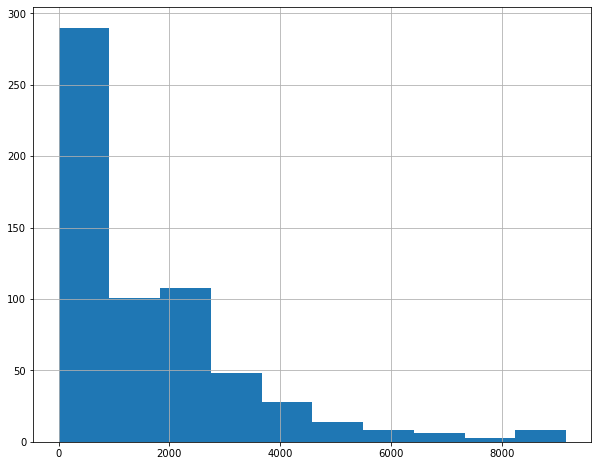

In [34]:
plt.figure(figsize=(10,8))
train_data['CoapplicantIncome'].hist()

In [35]:
UL=np.percentile(train_data['LoanAmount'], [85])[0]
UL

nan

In [36]:
train_data[train_data['LoanAmount']>UL]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [37]:
train_data['LoanAmount'][train_data['LoanAmount']>3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Here again, there is still some right skewness but its definetly better than the original. 

In [38]:
UL=np.percentile(train_data['Loan_Amount_Term'], [5])[0]
UL

nan

In [39]:
train_data['Loan_Amount_Term'][train_data['Loan_Amount_Term']<3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# DEALING WITH MISSING VALUES

In [41]:
#all the categorical values that need to be hot encoded are put together
features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History'] 

In [42]:
#One hot encoding all categorical features into features that the model can understand
new_train_data=pd.get_dummies(data=train_data, columns=features) 
new_train_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,NaN,360.0,Y,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,N,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,Y,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583.0,2358.0,120.0,360.0,Y,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000.0,0.0,141.0,360.0,Y,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,Y,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106.0,0.0,40.0,180.0,Y,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072.0,240.0,253.0,360.0,Y,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583.0,0.0,187.0,360.0,Y,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [43]:
#finding the correlation between all variables
new_train_data.corr() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
ApplicantIncome,1.000000,-0.166157,0.632449,-0.022578,-0.057550,0.013538,-0.040339,0.037697,-0.100813,0.068668,...,0.120254,0.171879,-0.171879,-0.156080,0.192496,0.014759,-0.005424,-0.008674,-0.019780,0.038081
CoapplicantIncome,-0.166157,1.000000,0.228179,-0.035108,-0.171549,0.165119,-0.193660,0.199898,0.010247,-0.018878,...,-0.023115,0.060225,-0.060225,0.017844,-0.024999,0.055458,-0.012618,-0.040610,0.007104,-0.059771
LoanAmount,0.632449,0.228179,1.000000,0.039447,-0.109520,0.065501,-0.149743,0.148367,-0.150398,0.063596,...,0.156271,0.171133,-0.171133,-0.114148,0.117421,0.043942,-0.008401,-0.034003,0.001463,-0.035156
Loan_Amount_Term,-0.022578,-0.035108,0.039447,1.000000,0.074539,-0.071026,0.102049,-0.104608,0.115838,-0.087491,...,-0.077850,0.078784,-0.078784,0.040768,-0.034361,0.034827,0.061957,-0.098112,-0.000445,0.005550
Gender_Female,-0.057550,-0.171549,-0.109520,0.074539,1.000000,-0.934236,0.364569,-0.367389,0.148421,0.004466,...,-0.096319,0.045364,-0.045364,-0.023918,0.000525,-0.080283,0.108623,-0.034530,0.009170,-0.026655
Gender_Male,0.013538,0.165119,0.065501,-0.071026,-0.934236,1.000000,-0.336818,0.339026,-0.137237,0.008319,...,0.064234,-0.061497,0.061497,0.039440,-0.027421,0.075128,-0.113069,0.044109,-0.021612,0.035780
Married_No,-0.040339,-0.193660,-0.149743,0.102049,0.364569,-0.336818,1.000000,-0.989310,0.348175,-0.113853,...,-0.132566,0.012304,-0.012304,-0.021584,-0.004489,0.006805,-0.005845,-0.000546,0.010938,0.018150
Married_Yes,0.037697,0.199898,0.148367,-0.104608,-0.367389,0.339026,-0.989310,1.000000,-0.355644,0.118052,...,0.135217,-0.017671,0.017671,0.016628,0.008491,-0.000220,-0.000229,0.000449,-0.006690,-0.023626
Dependents_0,-0.100813,0.010247,-0.150398,0.115838,0.148421,-0.137237,0.348175,-0.355644,1.000000,-0.531373,...,-0.358315,0.036563,-0.036563,0.075186,-0.088254,0.044015,-0.004173,-0.038264,-0.020500,0.019743
Dependents_1,0.068668,-0.018878,0.063596,-0.087491,0.004466,0.008319,-0.113853,0.118052,-0.531373,1.000000,...,-0.134337,0.013355,-0.013355,-0.079472,0.082044,-0.084117,0.011661,0.069320,-0.009757,-0.030415


In [44]:
new_train_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,NaN,360.0,Y,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,N,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,Y,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583.0,2358.0,120.0,360.0,Y,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000.0,0.0,141.0,360.0,Y,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [45]:
#importing the model to replace the missing numerical values with their nearest neighbours
from sklearn.impute import KNNImputer 

In [46]:
#n_neighbours set to 20 to have a wide variety of values to be replaced with
imputer=KNNImputer(n_neighbors=20) 
new_train_data=imputer.fit_transform(new_train_data.drop(columns=['Loan_Status']))

In [47]:
#splitting into X and y, X is the independednt features and y is the value to be predicted
X=new_train_data
y=train_data['Loan_Status']  

In [48]:
print(X.shape)
print(y.shape)

(614, 21)
(614,)


# MODEL SELECTION

IMPORTING ALL THE DATA NECCESARY FOR THE MODEL SELECTION PROCESS

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#splitting the data into training and testing, and allocating 20% of the data to the testset
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0) 

LOGSITIC REGRESSION IS THE FIRST MODEL USED HERE

In [51]:
#logistic regression is used to fit the training data for training and predict using the testing data
Lr=LogisticRegression() 
Lr.fit(X_train,y_train)
Lr_pred_train=Lr.predict(X_train)
Lr_pred_test=Lr.predict(X_test)

XGBOOST IS THE NEXT MODEL USED 

In [52]:
#Xgboost is used to fit the training data for training and predict using the testing data, and after a couple of hyperparameter tuning, found these gave the best results
xg=XGBClassifier(max_depth=8,n_estimators=90,learning_rate=0.1) 
xg.fit(X_train,y_train)
xg_pred_train=xg.predict(X_train)
xg_pred_test=xg.predict(X_test)

# METRICS TO CHECK HOW WELL OUR MODELS ARE DOING

ACCURACY SCORE OF BOTH THE LOGISTIC REGRESSION AND XGBOOST MODEL

In [53]:
print('The Training Accuracy score of the Logistic Regression model is :',accuracy_score(y_train,Lr_pred_train))
print('The Testing Accuracy score of the Logistic Regression model is :',accuracy_score(y_test,Lr_pred_test))
print('****************************************************************************************')
print('The Training Accuracy score of the XGBoost model is :',accuracy_score(y_train,xg_pred_train))
print('The Testing Accuracy score of the XGBoost model is :',accuracy_score(y_test,xg_pred_test))

The Training Accuracy score of the Logistic Regression model is : 0.7881873727087576
The Testing Accuracy score of the Logistic Regression model is : 0.8130081300813008
****************************************************************************************
The Training Accuracy score of the XGBoost model is : 0.9938900203665988
The Testing Accuracy score of the XGBoost model is : 0.8373983739837398


F1 SCORE OF BOTH THE LOGISTIC REGRESSION AND XGBOOST MODEL

In [54]:
print('The Training f1 score of the Logistic Regression model is :',f1_score(y_train,Lr_pred_train,average='weighted'))
print('The Testing f1 score of the Logistic Regression model is :',f1_score(y_test,Lr_pred_test,average='weighted'))
print('****************************************************************************************')
print('The Training f1 score of the XGBoost model is :',f1_score(y_train,xg_pred_train,average='weighted'))
print('The Testing f1 score of the XGBoost model is :',f1_score(y_test,xg_pred_test,average='weighted'))

The Training f1 score of the Logistic Regression model is : 0.7708127624576461
The Testing f1 score of the Logistic Regression model is : 0.7996935257310688
****************************************************************************************
The Training f1 score of the XGBoost model is : 0.9938849771443972
The Testing f1 score of the XGBoost model is : 0.8339205692197175


WE CAN SEE FROM BOTH THE ACCURACY AND F1SCORE OF THE XGBOOST THAT THE MODEL IS OVERFITTING TO THE TRAINING DATA, WE DONT HAVE A LOT OF DATA TO WORK WITH AND I CANT FIND MORE SINCE THIS IS FOR COMPETITION PURPOSES

--------------------------------------------------------

THE XG BOOST SHOWED BETTER PERFORMANCE THAN THE LOGISTIC REGRESSION MODEL, SO THATS THE MODEL THAT WOULD BE PICKED

In [55]:
#Confusion matrix to give a better picture of the accuracy
cm=confusion_matrix(y_test,xg_pred_test)
cm

array([[21, 12],
       [ 8, 82]], dtype=int64)

IT CAN BE SEEN THAT ONLY 20 OUT OF THE 123 DATA POINTS WERENT CLASSIFIED PROPERLY WHICH SHOWS A VERY GOOD MODEL

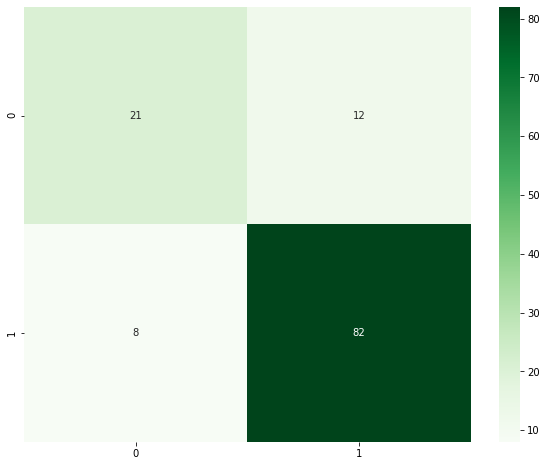

In [56]:
#visualizing the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True,cmap='Greens')

THIS SHOWS WE HAVE A VERY GOOD MODEL FOR PREDICTING WHICH CUSTOMERS ARE VIABLE FOR LOANS TO QUITE A HIGH ACCURACY

# PREPROCESSING THE TEST DATASET

THE TEST DATA WOULD BE PREPROCESSED THE SAME WAY AS THE TRAINING DATASET FOR SUBMISSION FOR GRADING

In [57]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [58]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())

In [60]:
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())

In [61]:
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

In [62]:
test_data['Married']=test_data['Married'].fillna(test_data['Married'].mode()[0])

In [63]:
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [64]:
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])

In [65]:
UL=np.percentile(test_data['ApplicantIncome'],[90]) [0]
test_data['ApplicantIncome'][test_data['ApplicantIncome']>3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
UL=np.percentile(test_data['CoapplicantIncome'], [85])[0]
test_data['CoapplicantIncome'][test_data['CoapplicantIncome']>3*UL]=3*UL


C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
UL=np.percentile(test_data['LoanAmount'], [85])[0]
test_data['LoanAmount'][test_data['LoanAmount']>3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
UL=np.percentile(test_data['Loan_Amount_Term'], [1])[0]
test_data['Loan_Amount_Term'][test_data['Loan_Amount_Term']<3*UL]=3*UL

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
new_test_data=test_data.drop(columns=['Loan_ID'])

In [70]:
features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']

In [71]:
new_test_data1=pd.get_dummies(new_test_data, columns=features)

In [72]:
imputer=KNNImputer(n_neighbors=20)
new_test_data1=imputer.fit_transform(new_test_data1)

In [73]:
X.shape

(614, 21)

In [74]:
predictions=xg.predict(new_test_data1)
predictions

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [75]:
#preparing for submission
submission = pd.DataFrame({'Loan_ID': test_data.Loan_ID, 'Loan_Status': predictions})
submission.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [76]:
if len(submission)==len(test_data):
    print('Submission is succesful')
else:
    print('DataHack wont accept')

Submission is succesful


In [77]:
submission.to_csv(r'D:\ML DATA\MAchine learning data\LoanPrediction_submissionNEW.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


THE MODEL IS READY FOR DEPLOYMENT!